In [17]:
import pandas as pd


In [18]:
train_df = pd.read_csv('../data/raw/captors.csv')
train_df.head()

timestamp  temp√©rature  pression  humidit√©         salle  \
0  2025-06-02T08:00:00        18.54    1009.9      37.4  Amphitheatre   
1  2025-06-02T08:00:00        19.89    1007.9      37.0          C013   
2  2025-06-02T08:00:00        20.53    1013.2      39.6          A006   
3  2025-06-02T09:00:00        30.78    1014.5      37.5  Amphitheatre   
4  2025-06-02T09:00:00        24.86    1009.0      44.8          C013   

   capacit√© jour_semaine type_jour  occupation_%  temp√©rature_ext  \
0       200       Monday   semaine           0.0            19.45   
1        35       Monday   semaine           0.0            19.66   
2        70       Monday   semaine           0.0            19.95   
3       200       Monday   semaine          91.5            21.90   
4        35       Monday   semaine          65.5            23.36   

   √©v√©nement_sp√©cial  
0                  1  
1                  0  
2                  0  
3                  0  
4                  0

In [19]:
train_df.describe()

temp√©rature     pression    humidit√©    capacit√©  occupation_%  \
count   330.000000   330.000000  330.000000  330.000000    330.000000   
mean     24.561394  1011.923333   39.687879  101.666667     57.330303   
std       4.765012     2.075395    4.976416   71.092930     32.089582   
min      11.690000  1006.300000   23.600000   35.000000      0.000000   
25%      21.447500  1010.500000   36.400000   35.000000     34.625000   
50%      24.965000  1012.100000   39.600000   70.000000     67.400000   
75%      27.647500  1013.300000   42.775000  200.000000     81.950000   
max      35.510000  1017.500000   52.500000  200.000000    100.000000   

       temp√©rature_ext  √©v√©nement_sp√©cial  
count       330.000000         330.000000  
mean         21.686455           0.275758  
std           3.194593           0.447574  
min          11.730000           0.000000  
25%          19.652500           0.000000  
50%          22.450000           0.000000  
75%          24.085000           1.000000  
max          27.230000           1.000000

In [20]:
train_df.isnull().sum()

timestamp            0
temp√©rature          0
pression             0
humidit√©             0
salle                0
capacit√©             0
jour_semaine         0
type_jour            0
occupation_%         0
temp√©rature_ext      0
√©v√©nement_sp√©cial    0
dtype: int64

In [21]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   timestamp          330 non-null    object 
 1   temp√©rature        330 non-null    float64
 2   pression           330 non-null    float64
 3   humidit√©           330 non-null    float64
 4   salle              330 non-null    object 
 5   capacit√©           330 non-null    int64  
 6   jour_semaine       330 non-null    object 
 7   type_jour          330 non-null    object 
 8   occupation_%       330 non-null    float64
 9   temp√©rature_ext    330 non-null    float64
 10  √©v√©nement_sp√©cial  330 non-null    int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 28.5+ KB


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
train_df["timestamp"] = pd.to_datetime(train_df["timestamp"])
train_df["heure"] = train_df["timestamp"].dt.hour
train_df["jour"] = train_df["timestamp"].dt.day_name()

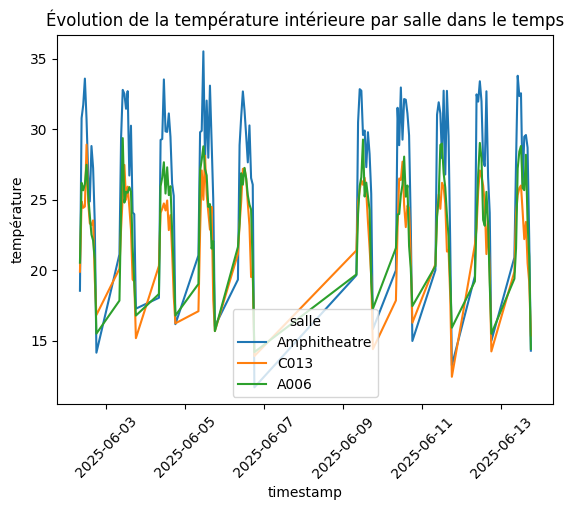

In [24]:
sns.lineplot(data=train_df, x="timestamp", y="temp√©rature", hue="salle")
plt.title("√âvolution de la temp√©rature int√©rieure par salle dans le temps")
plt.xticks(rotation=45)
plt.show()


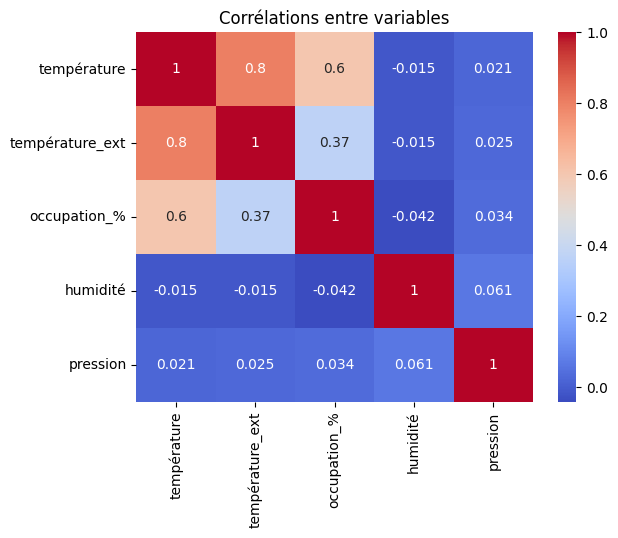

In [25]:
sns.heatmap(
    train_df[
        ["temp√©rature", "temp√©rature_ext", "occupation_%", "humidit√©", "pression"]
    ].corr(),
    annot=True,
    cmap="coolwarm",
)
plt.title("Corr√©lations entre variables")
plt.show()


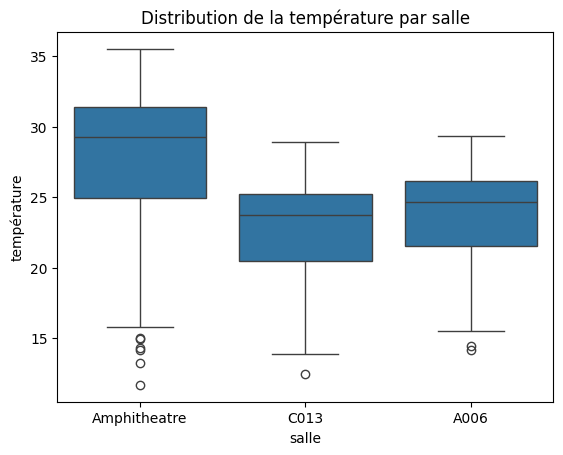

In [26]:
sns.boxplot(data=train_df, x="salle", y="temp√©rature")
plt.title("Distribution de la temp√©rature par salle")
plt.show()


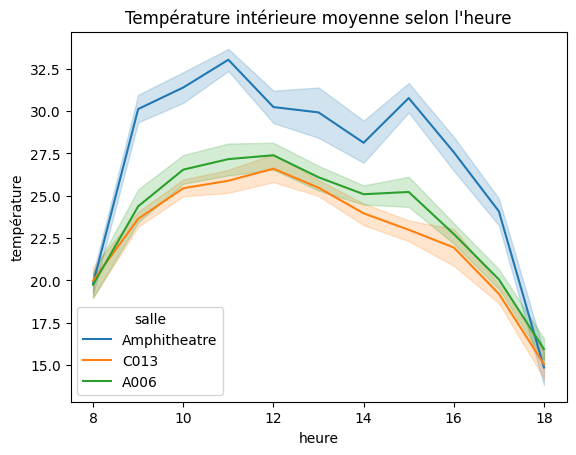

In [27]:
sns.lineplot(data=train_df, x="heure", y="temp√©rature", hue="salle")
plt.title("Temp√©rature int√©rieure moyenne selon l'heure")
plt.show()


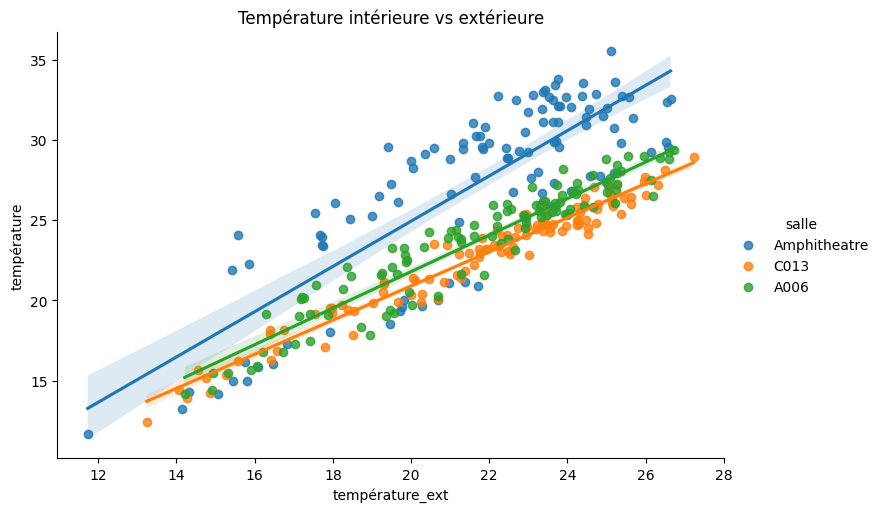

In [28]:
sns.lmplot(data=train_df, x="temp√©rature_ext", y="temp√©rature", hue="salle", aspect=1.5)
plt.title("Temp√©rature int√©rieure vs ext√©rieure")
plt.show()


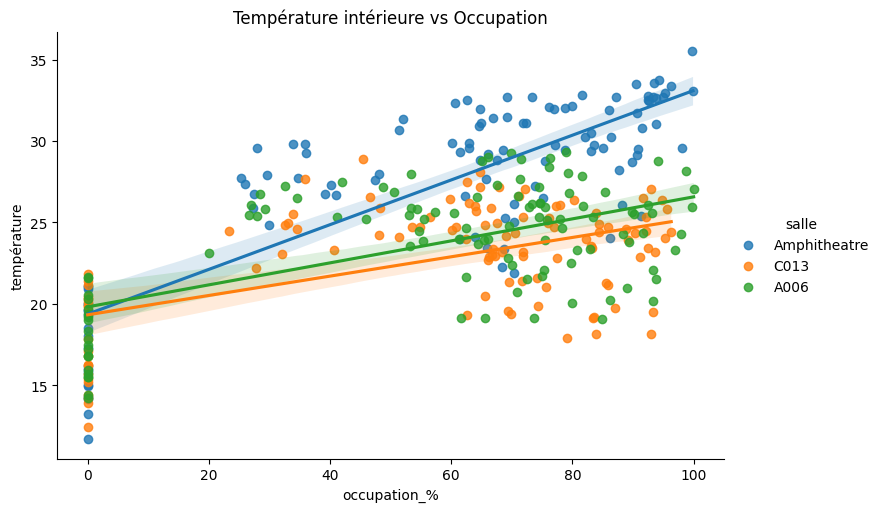

In [29]:
sns.lmplot(data=train_df, x="occupation_%", y="temp√©rature", hue="salle", aspect=1.5)
plt.title("Temp√©rature int√©rieure vs Occupation")
plt.show()


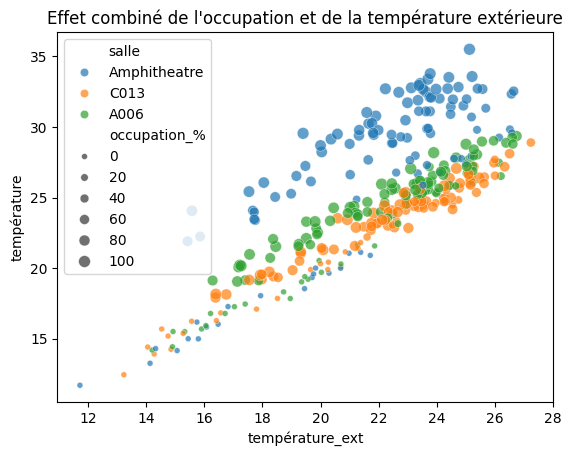

In [30]:
sns.scatterplot(
    data=train_df,
    x="temp√©rature_ext",
    y="temp√©rature",
    size="occupation_%",
    hue="salle",
    alpha=0.7,
)
plt.title("Effet combin√© de l'occupation et de la temp√©rature ext√©rieure")
plt.show()


# üéØ Objectif de l‚ÄôEDA
Comprendre les facteurs qui influencent la temp√©rature int√©rieure dans les salles, afin de construire un mod√®le de pr√©diction fiable.

## üîç Principaux enseignements

### 1. üìà La temp√©rature int√©rieure varie de mani√®re pr√©visible dans le temps
- Elle augmente en journ√©e, ce qui sugg√®re un effet d‚Äôaccumulation thermique (rayonnement, pr√©sence humaine).
- Elle est plus basse le matin (ex. √† 8h) et redescend apr√®s 17h.

>üìå Conclusion : l'heure de la journ√©e est un facteur important, surtout s‚Äôil est combin√© √† d'autres (occupation, temp√©rature ext√©rieure).

### 2. üå°Ô∏è Lien clair avec la temp√©rature ext√©rieure
- La temp√©rature int√©rieure est positivement corr√©l√©e √† la temp√©rature ext√©rieure.
- Mais cette corr√©lation varie selon les salles (meilleure isolation, exposition, etc.).

>üìå Conclusion : la temp√©rature ext√©rieure doit absolument √™tre dans ton mod√®le.

### 3. üë• L‚Äôoccupation influence la temp√©rature
- Lorsqu‚Äôune salle est tr√®s remplie (80-100%), la temp√©rature int√©rieure est syst√©matiquement plus √©lev√©e.
- L'effet est plus marqu√© en milieu ou fin de journ√©e.

>üìå Conclusion : le % d‚Äôoccupation est un tr√®s bon pr√©dicteur, mais l‚Äôeffet est mod√©r√©. Il interagit sans doute avec l‚Äôheure et la taille de la salle.

### 4. üè´ Chaque salle a son propre ‚Äúcomportement thermique‚Äù
- L‚Äôamphith√©√¢tre (grande capacit√©) a des variations plus fortes.
- Les petites salles (C013, A006) sont plus sensibles √† l‚Äôoccupation et √† la m√©t√©o.

>üìå Conclusion : un entra√Ænement par salle peut √™tre envisag√©.

### 5. üß™ Corr√©lations utiles pour le mod√®le

| Variable               | Corr√©lation avec temp√©rature | Utiliser dans le mod√®le ? |
| ---------------------- | ---------------------------- | ------------------------- |
| Temp√©rature ext√©rieure | **Forte (+)**                | ‚úÖ Oui                     |
| Occupation %           | **Mod√©r√©e (+)**              | ‚úÖ Oui                     |
| Heure                  | **Structurelle**             | ‚úÖ Oui                     |
| Salle (cat√©gorielle)   | **Indispensable**            | ‚úÖ Oui                     |
| Humidit√© / Pression    | Faible √† mod√©r√©e             | ‚ö†Ô∏è √Ä tester               |

